In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_csv("C:\\Users\\PMLS\\Downloads\\police.csv")
print(df.head(3))

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   

  stop_outcome is_arrested stop_duration  drugs_related_stop district  
0     Citation       False      0-15 Min               False  Zone X4  
1     Citation       False      0-15 Min               False  Zone K3  
2     Citation       False      0-15 Min               False  Zone X4  


In [3]:
#Calculating the missing values for each column
df.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [4]:
#dropping a county_name column having Nan values
df.drop('county_name',axis='columns',inplace=True)

In [5]:
df.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [5]:
df.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [6]:
df.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [7]:
#Changing the data type of is_arrested column
df['is_arrested']=df.is_arrested.astype('bool')



In [8]:
# combining both date and time columnn for making the analysis easier
combined=df.stop_date.str.cat(df.stop_time,sep=" ")

In [9]:
# Making a separate for combined date and time
df['Date_and_Time']=pd.to_datetime(combined)

In [10]:
df.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,Date_and_Time
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00


In [11]:
# Set the new Date and Time column as index for easy analysis
df.set_index(['Date_and_Time'],inplace=True)

In [12]:
df['driver_gender']=df.driver_gender.astype('str')


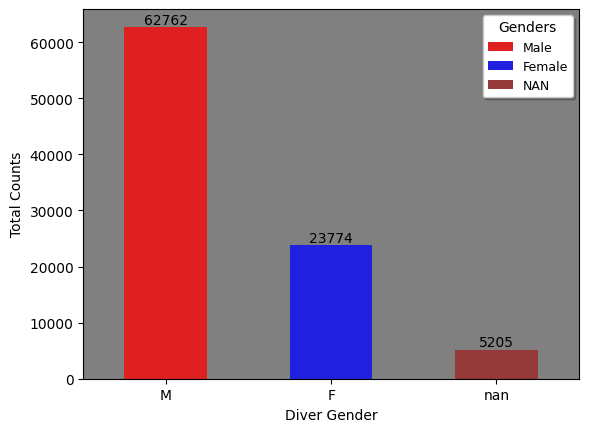

In [13]:
# Visualizing the Gender of the driver that are involved in the accident 
ax=sns.countplot(data=df,x=df['driver_gender'],hue=df['driver_gender'],palette=['red','blue','brown'],width=0.5)
plt.xlabel('Diver Gender')
plt.ylabel('Total Counts')
for bar in ax.containers:
    ax.bar_label(bar)
    ax.set_facecolor('gray')
    ax.legend(labels=['Male',"Female","NAN"],title='Genders',shadow=True,prop={'size':9})
plt.show()

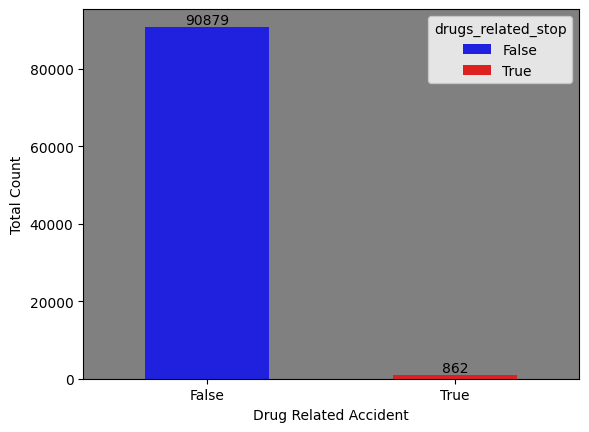

In [15]:
# Visualizing the number of accident occur due to Drugs
ax=sns.countplot(data=df,x=df['drugs_related_stop'],hue=df['drugs_related_stop'],palette=['blue','red'],width=0.5)
for num in ax.containers:
    ax.bar_label(num)
    
plt.xlabel("Drug Related Accident")
plt.ylabel("Total Count")
ax.set_facecolor('gray')
plt.show()

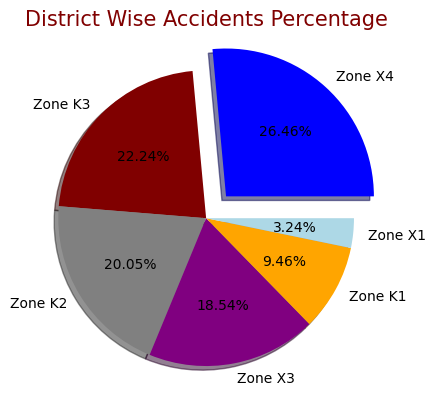

In [16]:
# Visualizing the Percentage  of accidents in every district by using the pie chart
x=df['district'].value_counts()
exp=[0.2,0,0,0,0,0]
colors=['blue','maroon','grey','purple','orange','lightblue']
plt.pie(x,labels=x.index,autopct="%0.2f%%",explode=exp,shadow=True,colors=colors)

plt.title("District Wise Accidents Percentage",color='maroon',fontsize=15)
plt.show()

In [17]:
# count the unique values in the different types of violation for female gender
female=df[df['driver_gender']=='F']
print("For Female Gender")
female['violation'].value_counts(normalize=True)


For Female Gender


violation
Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: proportion, dtype: float64

In [18]:
# count the unique values in the different types of violation for male gender
male=df[df['driver_gender']=='M']
print("For Male Gender")
male['violation'].value_counts(normalize=True)

For Male Gender


violation
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: proportion, dtype: float64

In [19]:
# count the values of arrested person gender wise
female_arrested=df[(df['driver_gender']=="F") & (df['is_arrested']==True)]
female_arrested.head(20)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
Date_and_Time,,,,,,,,,,,,,,
2005-10-05 03:00:00,RI,2005-10-05,03:00,F,White,Equipment/Inspection Violation,Equipment,True,Incident to Arrest,Arrest Driver,True,16-30 Min,True,Zone K2
2005-10-06 21:50:00,RI,2005-10-06,21:50,F,White,Other Traffic Violation,Moving violation,True,Incident to Arrest,Arrest Driver,True,30+ Min,False,Zone X4
2005-10-10 17:50:00,RI,2005-10-10,17:50,F,White,Registration Violation,Registration/plates,True,Incident to Arrest,Arrest Driver,True,30+ Min,False,Zone K3
2005-10-11 00:40:00,RI,2005-10-11,00:40,F,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,0-15 Min,False,Zone X4
2005-10-13 01:55:00,RI,2005-10-13,01:55,F,White,Call for Service,Other,False,NaN,Arrest Driver,True,30+ Min,False,Zone K2
2005-10-23 00:49:00,RI,2005-10-23,00:49,F,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,16-30 Min,False,Zone K3
2005-10-26 00:05:00,RI,2005-10-26,00:05,F,White,Speeding,Speeding,True,Inventory,Arrest Driver,True,0-15 Min,False,Zone X4
2005-10-29 14:30:00,RI,2005-10-29,14:30,F,White,Other Traffic Violation,Moving violation,True,"Incident to Arrest,Probable Cause",Arrest Driver,True,30+ Min,True,Zone K3
2005-11-03 00:26:00,RI,2005-11-03,00:26,F,White,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,30+ Min,False,Zone X4


In [20]:
# Checking the gender effect on getting ticket or Warning for female
female_speeding=df[(df['driver_gender']=='F')&(df['violation']=="Speeding")]
female_speeding['stop_outcome'].value_counts(normalize=True)

stop_outcome
Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: proportion, dtype: float64

In [21]:
male_speeding=df[(df['driver_gender']=='M')&(df['violation']=="Speeding")]
male_speeding['stop_outcome'].value_counts(normalize=True)

stop_outcome
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: proportion, dtype: float64

In [22]:
df.groupby(['district','driver_gender']).is_arrested.mean()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
          nan              0.997382
Zone K2   F                0.022196
          M                0.034285
          nan              1.000000
Zone K3   F                0.025156
          M                0.034961
          nan              0.997633
Zone X1   F                0.019646
          M                0.024563
          nan              1.000000
Zone X3   F                0.027188
          M                0.038166
          nan              1.000000
Zone X4   F                0.042149
          M                0.049956
          nan              1.000000
Name: is_arrested, dtype: float64

In [23]:
# Affect of arrest rate by gender
df.groupby('driver_gender').is_arrested.mean()

driver_gender
F      0.028140
M      0.038383
nan    0.999424
Name: is_arrested, dtype: float64

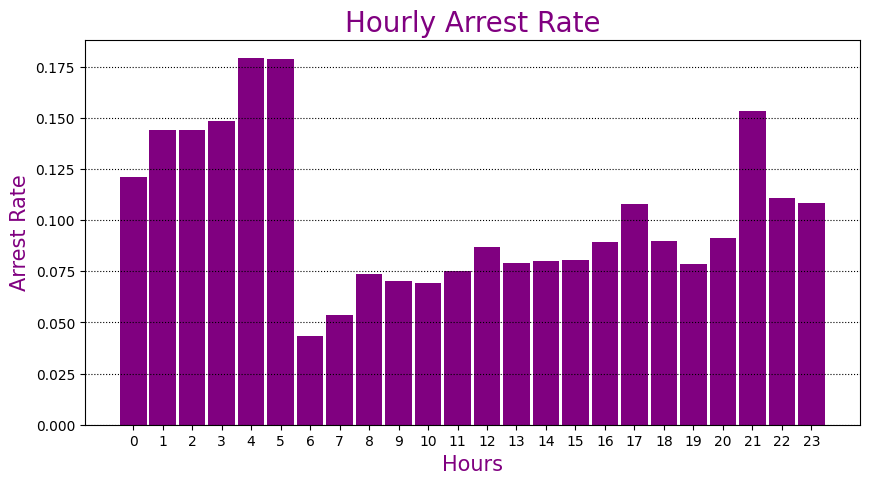

In [94]:
# visualizing the hourly based arrest rate
hourly_arrest_rate=df.groupby(df.index.hour).is_arrested.mean()
plt.figure(figsize=(10,5))
x=np.arange(0,24)
plt.bar(x,hourly_arrest_rate,color='purple',width=0.90)
plt.xticks(x)
plt.xlabel("Hours",color="purple",fontsize=15)
plt.ylabel("Arrest Rate",color="purple",fontsize=15)
plt.title("Hourly Arrest Rate",fontsize=20,color='purple')
plt.grid(linestyle='dotted',linewidth=0.8,axis='y',color='black')
plt.show()

Date_and_Time
2005-12-31    0.006390
2006-12-31    0.006913
2007-12-31    0.007520
2008-12-31    0.006998
2009-12-31    0.009079
2010-12-31    0.009407
2011-12-31    0.009035
2012-12-31    0.009388
2013-12-31    0.012283
2014-12-31    0.013280
2015-12-31    0.011787
Freq: YE-DEC, Name: drugs_related_stop, dtype: float64


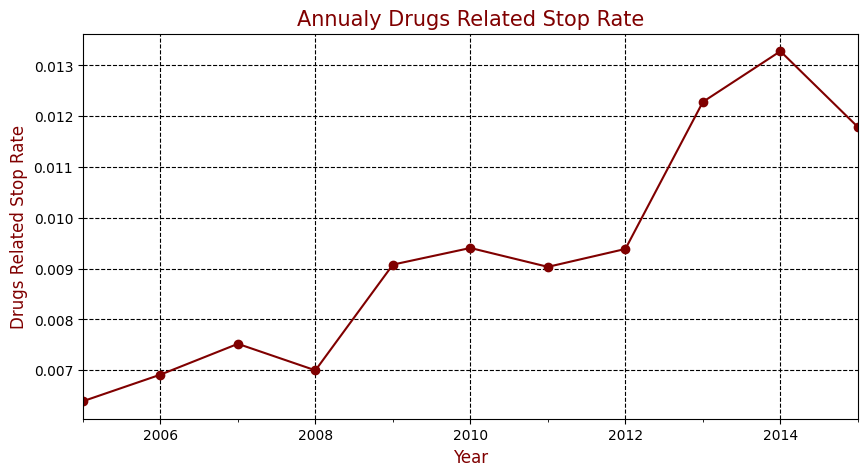

In [36]:
# Visualizing the trend of stop rate annualy
print(df['drugs_related_stop'].resample("YE").mean())
annuaaly_drug_related_stop=df['drugs_related_stop'].resample("YE").mean()
plt.figure(figsize=(10,5))
annuaaly_drug_related_stop.plot(kind='line',color="maroon",marker="o")

x_axis=np.arange(0,11)
plt.xlabel("Year",color="maroon",fontsize=12)
plt.ylabel("Drugs Related Stop Rate",color='maroon',fontsize=12)
plt.title("Annualy Drugs Related Stop Rate",color='maroon',fontsize=15)
plt.grid(linestyle="dashed",linewidth=0.8,color='black')


plt.show()

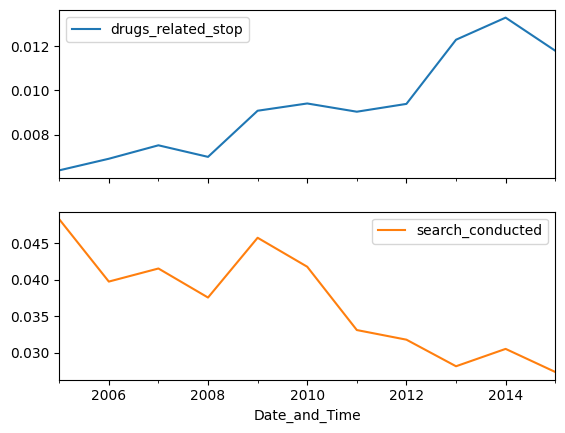

In [39]:
#Visualizing the trend of  both stop rate & Search Conducted Rate annualy
annualy_search_conducted=df['search_conducted'].resample("YE").mean()
annualy=pd.concat([annuaaly_drug_related_stop,annualy_search_conducted],axis='columns')
annualy.plot(subplots=True)

plt.show()

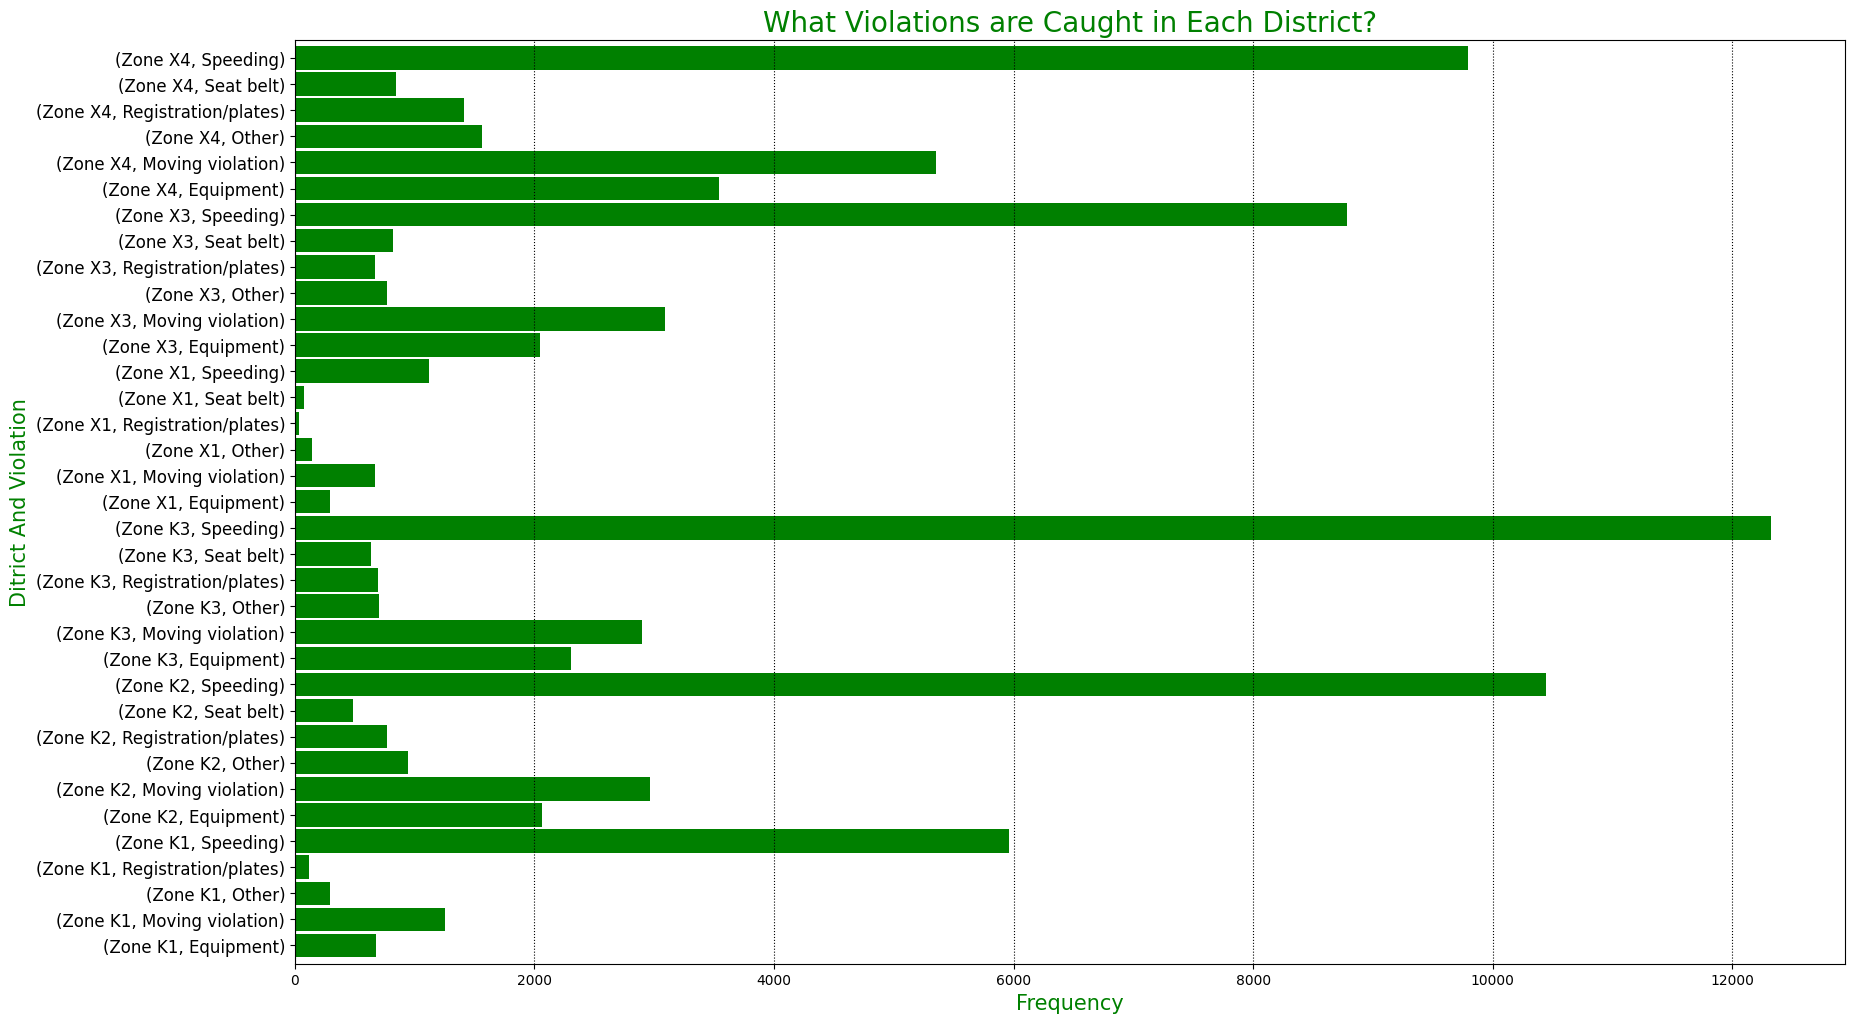

In [104]:
# Seperate  Visualization of distict and violations through bar plot
district_wise_violation=df.groupby(['district','violation'])
plt.figure(figsize=(20,12))
District=district_wise_violation['violation'].value_counts()
District.plot(kind='barh',color='green',width=0.9)
plt.ylabel("Ditrict And Violation",color="Green",fontsize=15)
plt.xlabel("Frequency",color='green',fontsize=15)
plt.yticks(fontsize=12)
plt.title("What Violations are Caught in Each District?",color='green',fontsize=20)
plt.grid(linestyle="dotted",linewidth=0.8,axis='x',color='black')
plt.show()

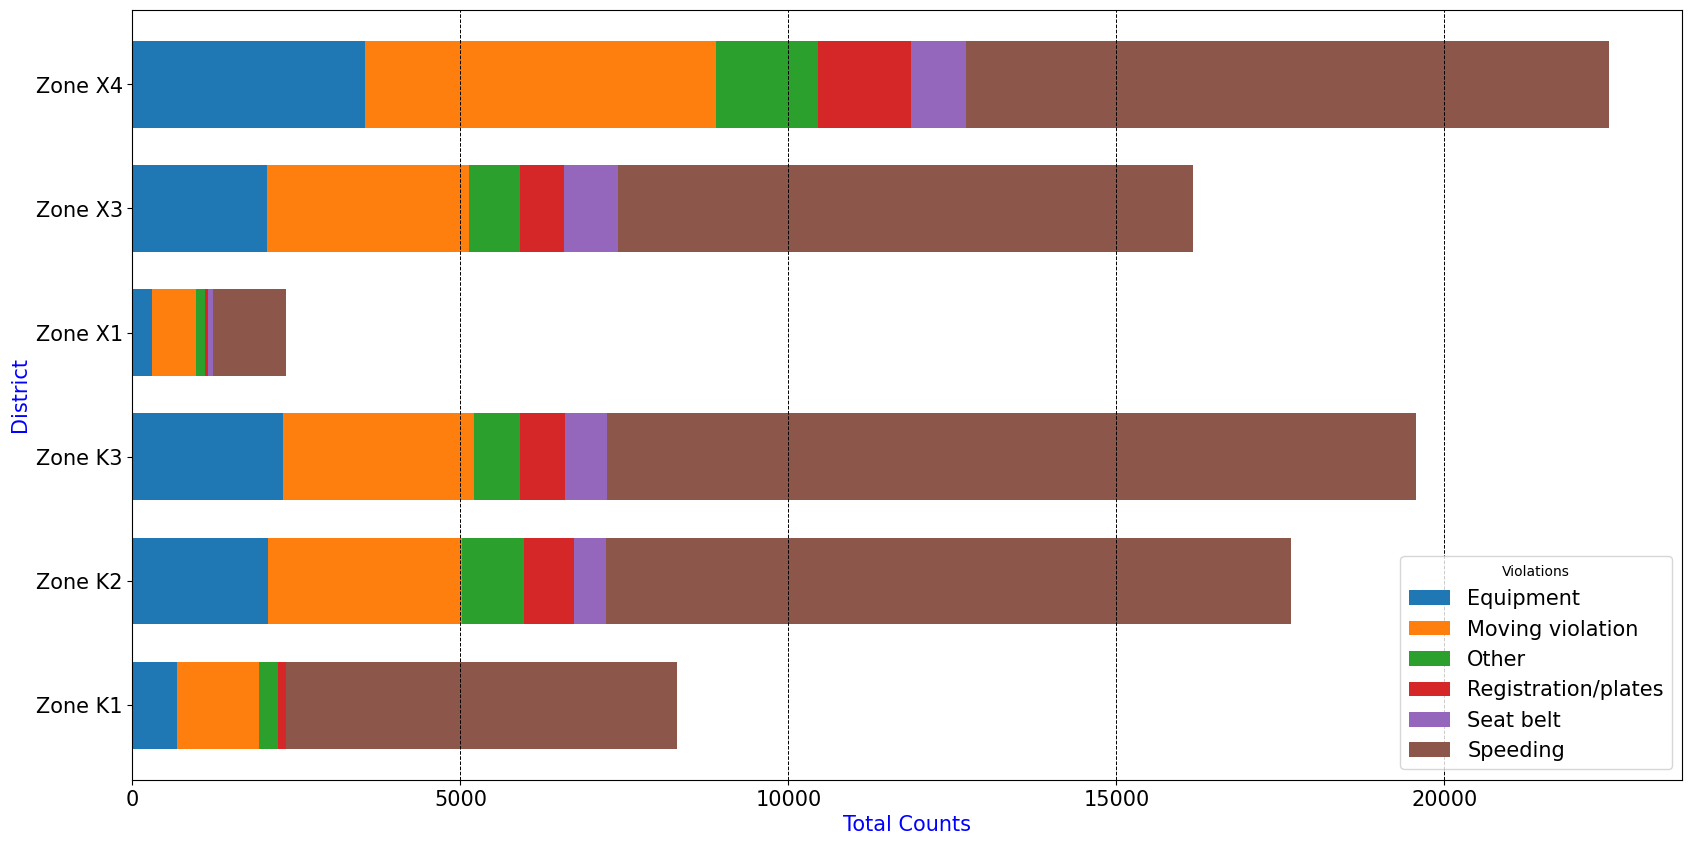

In [113]:
# Place District at the x-axis and display violations through bars 
Croos=pd.crosstab(df['district'],df['violation'])
Croos.plot(kind='barh',width=0.7,figsize=(20,10),stacked=True)#color={'green','maroon','grey','purple','orange','blue'})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("District",fontsize=15,color='blue')
plt.xlabel("Total Counts",fontsize=15,color='blue')
plt.legend(loc='best',title="Violations",fontsize=15)
plt.grid(linewidth=0.7,linestyle='dashed',color='black',axis='x')
plt.show()

violation_raw
APB                                 17.087912
Call for Service                    20.930316
Equipment/Inspection Violation      11.234756
Motorist Assist/Courtesy            17.107317
Other Traffic Violation             13.446006
Registration Violation              13.423711
Seatbelt Violation                   9.615546
Special Detail/Directed Patrol      14.643291
Speeding                            10.522035
Suspicious Person                   14.375000
Violation of City/Town Ordinance    13.171271
Warrant                             22.111111
Name: stop_minutes, dtype: float64


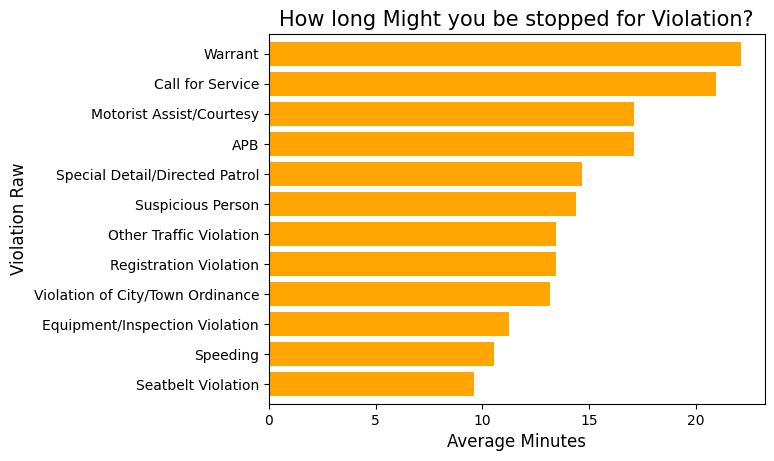

In [124]:
# Mappingthe minutes according to our desire then after visualizing violation raw against time  
mapping={"0-15 Min":8,"16-30 Min":23,"30+ Min":40}
df['stop_minutes']=df['stop_duration'].map(mapping)
print(df.groupby('violation_raw').stop_minutes.mean())
stop_minutes=df.groupby('violation_raw').stop_minutes.mean()
stop_minutes.sort_values().plot(kind='barh',width=0.8,color='orange')
plt.ylabel("Violation Raw",fontsize=12)
plt.xlabel("Average Minutes",fontsize=12)
plt.title("How long Might you be stopped for Violation?",fontsize=15)
plt.show()